# Rotten Tomatoes Movie Rating
Name: Christopher Hunt

## Project Overview

Large dataset
- [Rotten Tomatoes Movie Ratings]()

Data Dictionary:
- [rotten_tomatoes_movies]()
- [rotten_tomatoes_critic_reviews_50k]()

Objective:
- Predict whether a particular movie on Rotten Tomatoes is labeled as 'Rotten', 'Fresh', or 'Certified-Fresh'.

## Load and Inspect Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

In [2]:
df_movie = pd.read_csv('Data/rotten_tomatoes_movies.csv')
df_movie.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,127.0,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [3]:
# Taking a look at the amount of rows, columns in the dataset
print(f'There are {df_movie.shape[0]} columns and {df_movie.shape[1]} rows in this dataset.')

There are 17712 columns and 22 rows in this dataset.


In [4]:
# Checking for data distribution
df_movie.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [5]:
# Looking at the basic info
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

## Cleaning the Data

In [6]:
# checking for duplicate rows
df_movie.duplicated().sum()

0

There are no duplicates in this dataset.

In [7]:
# Checking dtypes
df_movie.dtypes

rotten_tomatoes_link                 object
movie_title                          object
movie_info                           object
critics_consensus                    object
content_rating                       object
genres                               object
directors                            object
authors                              object
actors                               object
original_release_date                object
streaming_release_date               object
runtime                             float64
production_company                   object
tomatometer_status                   object
tomatometer_rating                  float64
tomatometer_count                   float64
audience_status                      object
audience_rating                     float64
audience_count                      float64
tomatometer_top_critics_count         int64
tomatometer_fresh_critics_count       int64
tomatometer_rotten_critics_count      int64
dtype: object

Everything looks correct.

## Exploratory

### Correlation Map

In [8]:
# creating a correlation in the dataframe
corr = df_movie.corr(numeric_only=True)
corr

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
runtime,1.000000,0.089672,0.272304,0.229088,0.062672,0.243070,0.267346,0.149550
tomatometer_rating,0.089672,1.000000,0.083565,0.654068,0.013408,0.055090,0.339090,-0.400668
tomatometer_count,0.272304,0.083565,1.000000,0.147596,0.127442,0.925711,0.907241,0.681868
audience_rating,0.229088,0.654068,0.147596,1.000000,0.021885,0.130499,0.310079,-0.205912
audience_count,0.062672,0.013408,0.127442,0.021885,1.000000,0.124026,0.119320,0.079990
tomatometer_top_critics_count,0.243070,0.055090,0.925711,0.130499,0.124026,1.000000,0.807543,0.687473
tomatometer_fresh_critics_count,0.267346,0.339090,0.907241,0.310079,0.119320,0.807543,1.000000,0.311143
tomatometer_rotten_critics_count,0.149550,-0.400668,0.681868,-0.205912,0.079990,0.687473,0.311143,1.000000


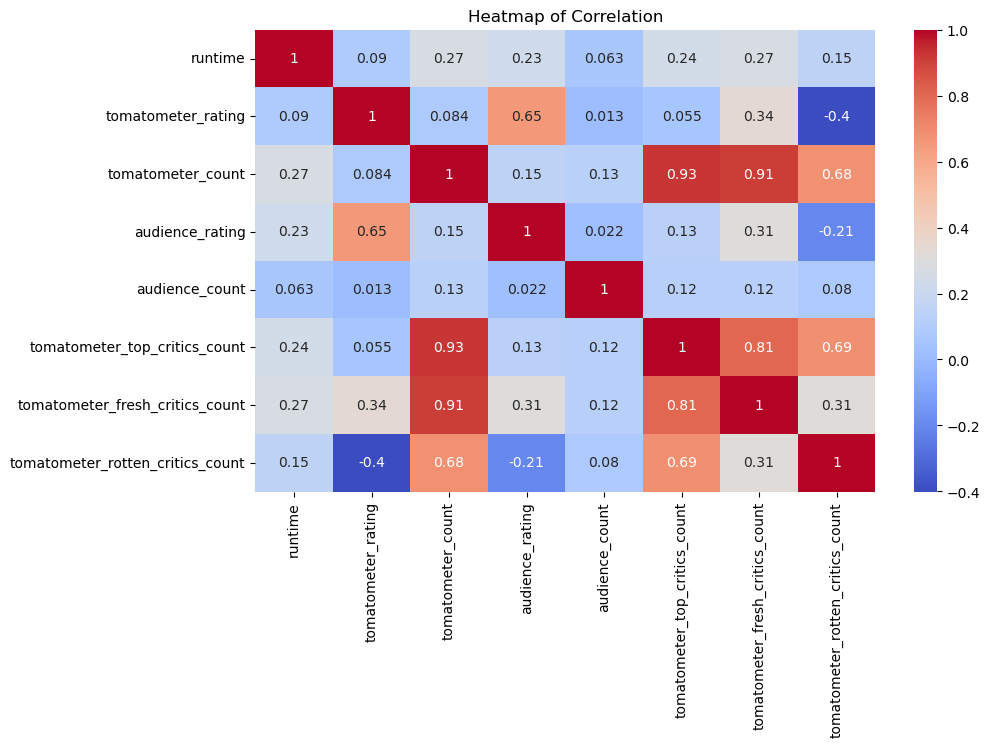

In [9]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a heatmap
ax = sns.heatmap(corr, cmap='coolwarm', annot=True);
ax.set_title('Heatmap of Correlation');

Positive Correlation:
- `tomatometer_count` has a moderately strong positive correlation with `tomatometer_fresh_critics_count (0.91)` and `tomatometer_top_critics_count (0.93)`. This indicates that as the total number of Tomatometer ratings increases, the counts of fresh and top critic ratings also tend to increase.

Negative Correlation:
- `tomatometer_rating` has a moderate negative correlation with `tomatometer_rotten_critics_count (-0.40)`. This suggests that movies with lower Tomatometer ratings tend to have a higher count of rotten critic ratings.

### Bar Charts

#### Distribution of Movies Across Content Ratings

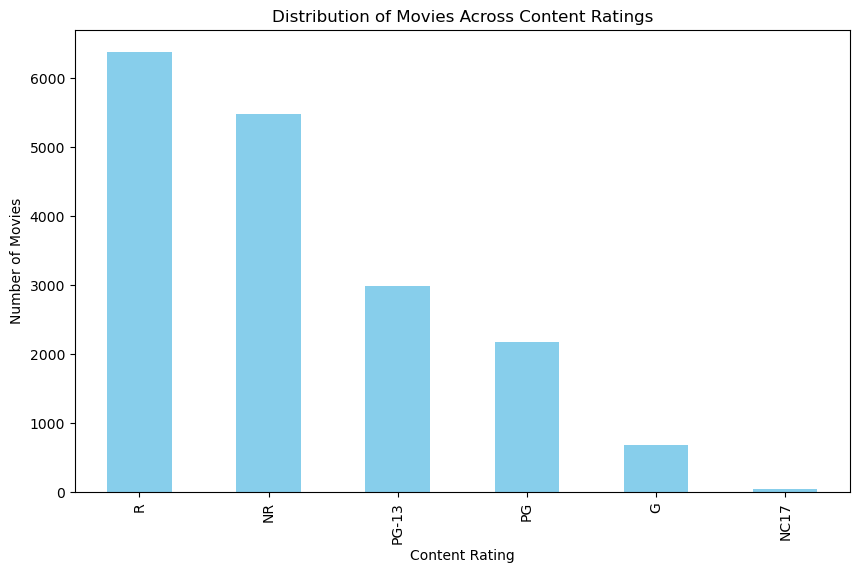

In [10]:
content_rating_counts = df_movie['content_rating'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
content_rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Movies Across Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')
plt.show()


The `R` rated movie dominates in terms of quantity, as evident from the graph provided.

#### Distribution of Movies by Genre

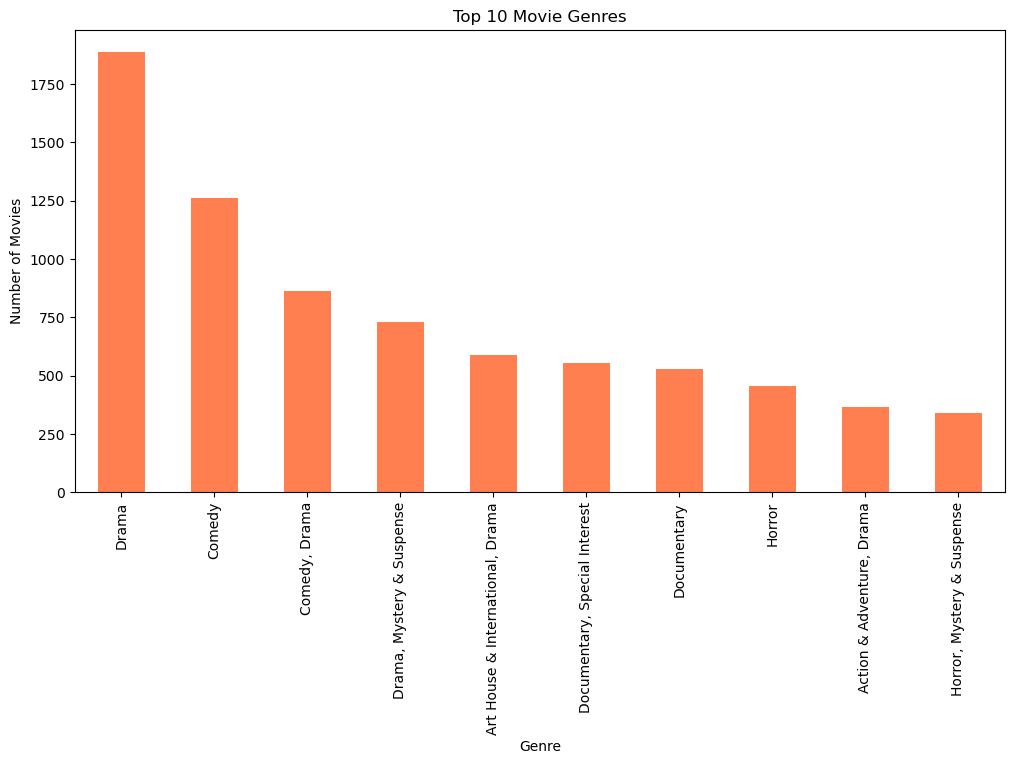

In [11]:
genre_counts = df_movie['genres'].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='coral')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

The graph above indicates that the Drama genre boasts the highest number of movies.

### Histograms

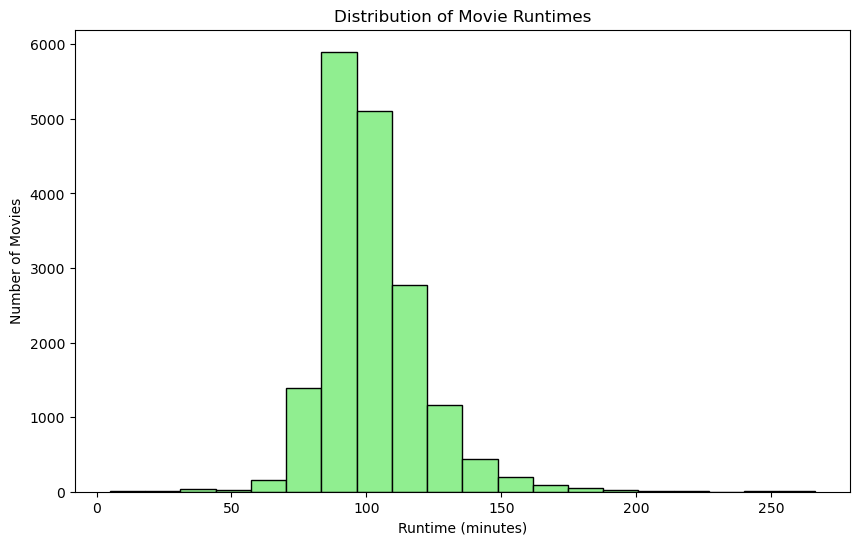

In [12]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_movie['runtime'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.show()

The graph above highlights that the average movie runtime is approximately 100 minutes.

### Pie Chart

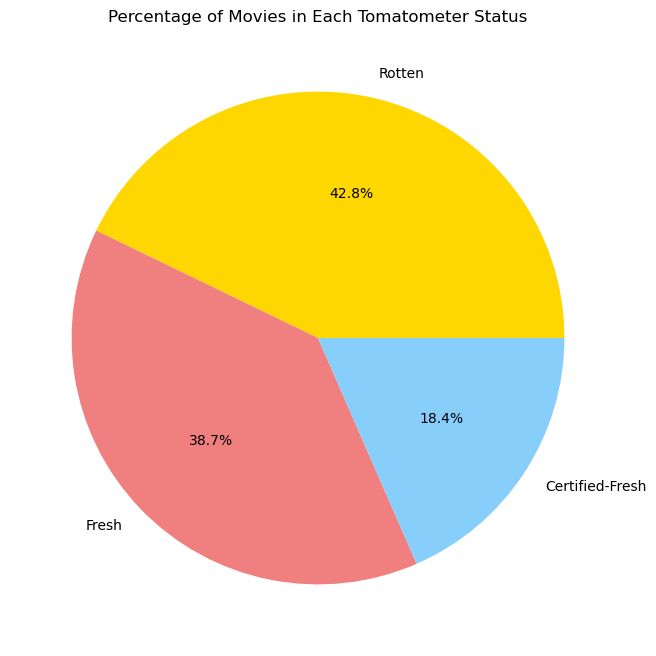

In [13]:
# Assuming df_movie is your DataFrame
tomatometer_status_counts = df_movie['tomatometer_status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(tomatometer_status_counts, labels=tomatometer_status_counts.index, autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Percentage of Movies in Each Tomatometer Status')
plt.show()

The distribution of Rotten Tomatoes ratings is depicted in the graph above, with `Rotten` leading the majority at `42.8%`, closely followed by `Fresh` at `38.7%`, and `Certified Fresh` trailing with `18.4%`.

### Boxplot

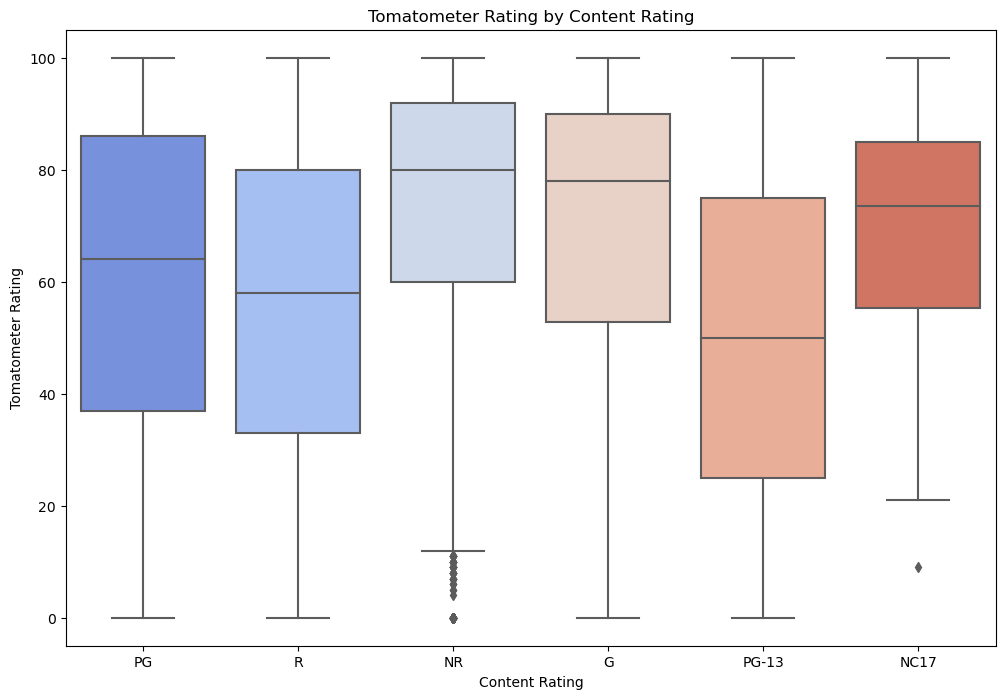

In [14]:
# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='content_rating', y='tomatometer_rating', data=df_movie, palette='coolwarm')
plt.title('Tomatometer Rating by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Tomatometer Rating')
plt.show()

The graph above reveals that movies rated `NR` and `G` hold the top positions among Content Ratings.

### Time Series Line Chart

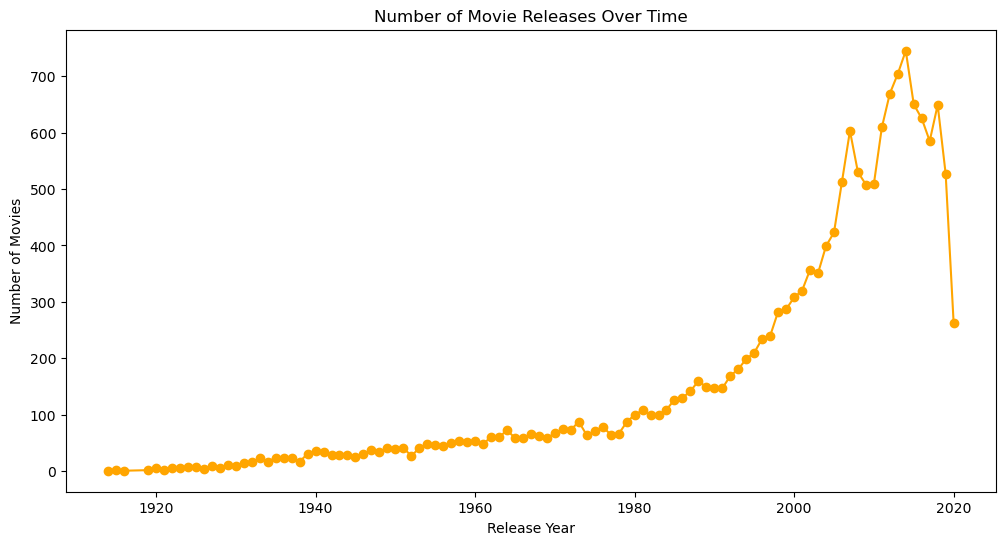

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_movie is your DataFrame
# Convert date columns to datetime
df_movie['original_release_date'] = pd.to_datetime(df_movie['original_release_date'])

# Extract year from the release date
df_movie['release_year'] = df_movie['original_release_date'].dt.year

# Count the number of releases per year
release_counts = df_movie['release_year'].value_counts().sort_index()

# Plotting the time series line chart
plt.figure(figsize=(12, 6))
release_counts.plot(kind='line', marker='o', color='orange')
plt.title('Number of Movie Releases Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

The graph above illustrates a growing trend in the release of movies over time.

## Data Preprocessing

#### Custom Function

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):

  # Get the classification report
  report = classification_report(y_true, y_pred)

  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)

  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)

  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")

  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()

  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):

  # Get predictions for training data
  y_train_pred = model.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()

  # Get predictions for test data
  y_test_pred = model.predict(X_test)

  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )

  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

#### Preprocessing Step One:

In [17]:
# Data preprocessing I: content_rating feature
print(f'Content Rating category: {df_movie["content_rating"].unique()}')

Content Rating category: ['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


[Text(0, 0, '6377'),
 Text(0, 0, '5474'),
 Text(0, 0, '2979'),
 Text(0, 0, '2168'),
 Text(0, 0, '676'),
 Text(0, 0, '38')]

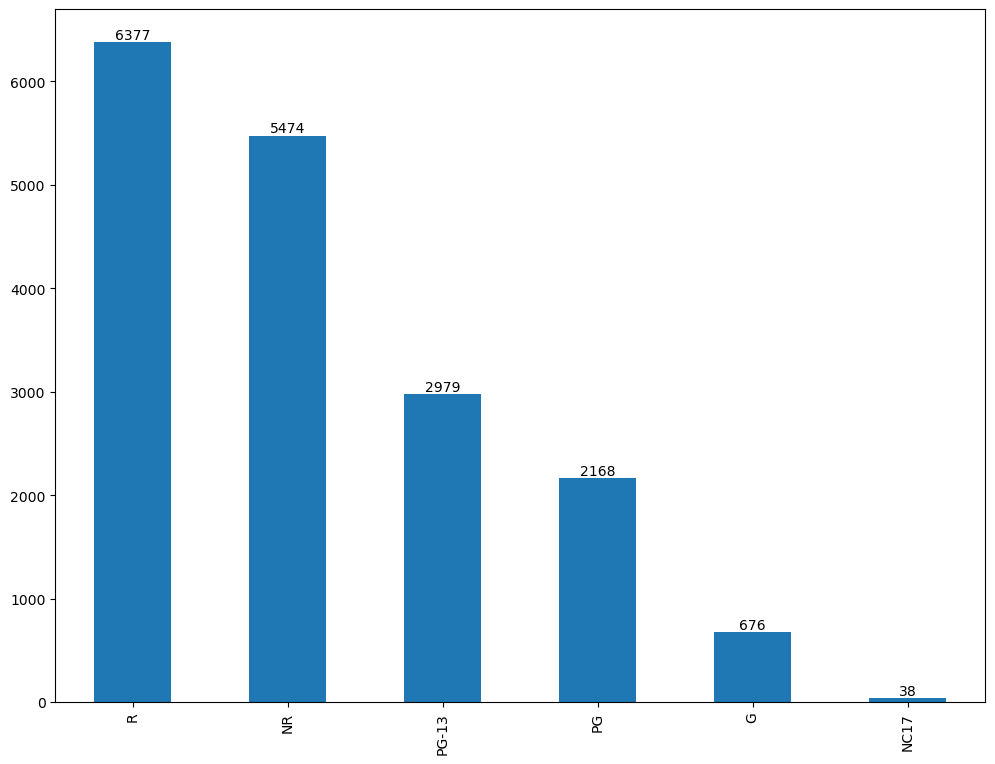

In [18]:
# Visualize the distribution of each category in content_rating feature
ax = df_movie.content_rating.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [19]:
# One hot encoding content_rating feature
content_rating = pd.get_dummies(df_movie['content_rating'])
content_rating.head()

,G,NC17,NR,PG,PG-13,R
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,1,0,0,0,0,0


#### Part 2

Audience status category: ['Spilled' 'Upright' nan]


[Text(0, 0, '9390'), Text(0, 0, '7874')]

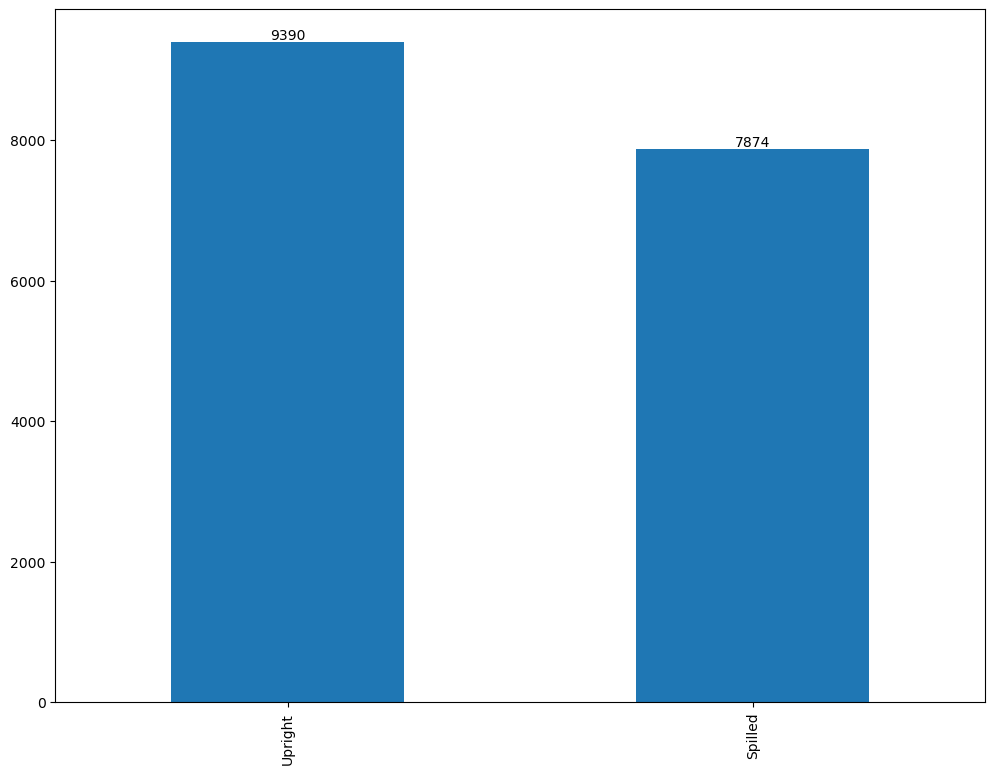

In [20]:
print(f'Audience status category: {df_movie["audience_status"].unique()}')

# Visualize the distribution of each category
ax = df_movie['audience_status'].value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [21]:
# Encode audience status feature with ordinal encoding
audience_status = pd.DataFrame(df_movie['audience_status'].replace(['Spilled','Upright'],[0,1]))
audience_status.head()

,audience_status
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


#### Part 3

In [22]:
# Encode tomatometer status feature with ordinal encoding
tomatometer_status = pd.DataFrame(df_movie['tomatometer_status'].replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2]))
tomatometer_status

,tomatometer_status
0,0.0
1,2.0
2,1.0
3,2.0
4,1.0
...,...
17707,0.0
17708,2.0
17709,1.0
17710,1.0


In [23]:
# Combine all of the features together into one dataframe
df = pd.concat([df_movie[['runtime', 'tomatometer_rating', 'tomatometer_count', 
                                  'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 
                                  'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']],
                        content_rating, audience_status, tomatometer_status], axis=1).dropna()
df.head()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
0,119.0,49.0,149.0,53.0,254421.0,43,73,76,0,0,0,1,0,0,0.0,0.0
1,90.0,87.0,142.0,64.0,11574.0,44,123,19,0,0,0,0,0,1,1.0,2.0
2,122.0,67.0,24.0,53.0,14684.0,2,16,8,0,0,0,0,0,1,0.0,1.0
3,95.0,100.0,54.0,97.0,105386.0,6,54,0,0,0,1,0,0,0,1.0,2.0
4,127.0,89.0,27.0,74.0,68918.0,5,24,3,1,0,0,0,0,0,1.0,1.0


In [24]:
# Check the distribution of feature dataframe
df.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
count,17017.000000,17017.000000,17017.000000,17017.000000,1.701700e+04,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000
mean,102.296233,60.519539,57.097197,60.324499,1.471183e+05,14.765999,36.237292,20.871188,0.039314,0.002174,0.294940,0.124993,0.171593,0.366986,0.542928,0.752718
std,18.653649,28.436397,66.814580,20.480600,1.783955e+06,15.172256,51.362454,29.978900,0.194346,0.046580,0.456029,0.330720,0.377037,0.481997,0.498168,0.747250
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,44.000000,7.410000e+02,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,66.000000,29.000000,62.000000,4.423000e+03,8.000000,17.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,111.000000,86.000000,76.000000,77.000000,2.606700e+04,23.000000,44.000000,24.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,266.000000,100.000000,535.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

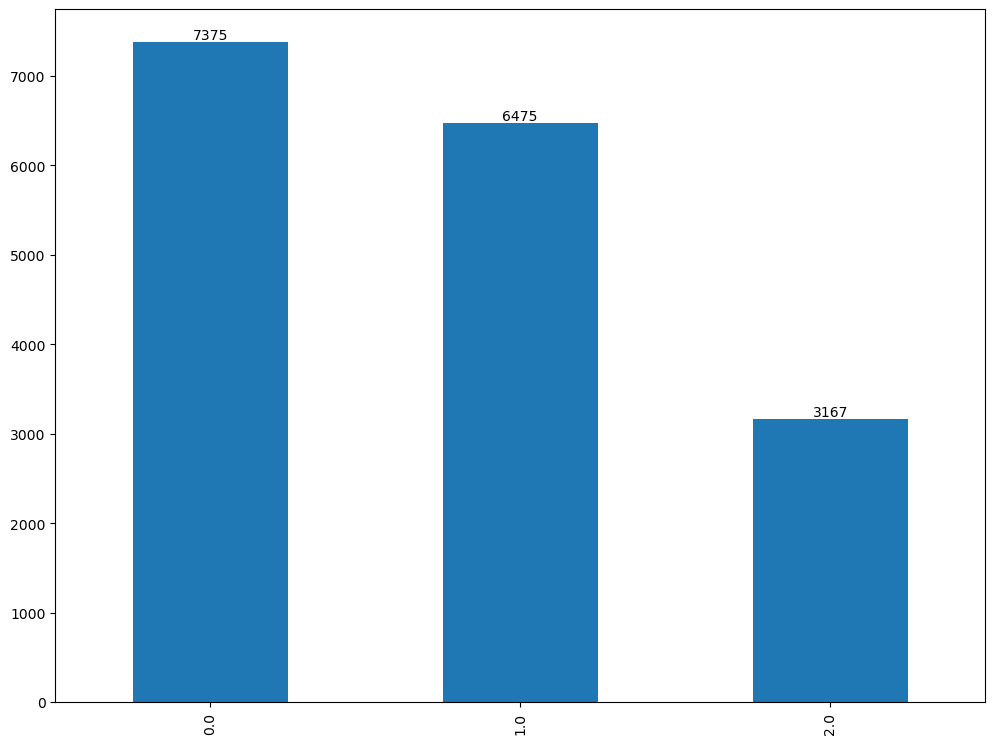

In [25]:
# Check class distribution of our target variable:tomatometer_status  
ax = df['tomatometer_status'].value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [26]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df.drop(['tomatometer_status'], axis=1), df['tomatometer_status'], test_size= 0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 13613 and the size of test data is 3404


Accuracy: 0.9462397179788484
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.97      0.88      0.93      1286
         2.0       0.80      0.95      0.87       630

    accuracy                           0.95      3404
   macro avg       0.92      0.94      0.93      3404
weighted avg       0.95      0.95      0.95      3404



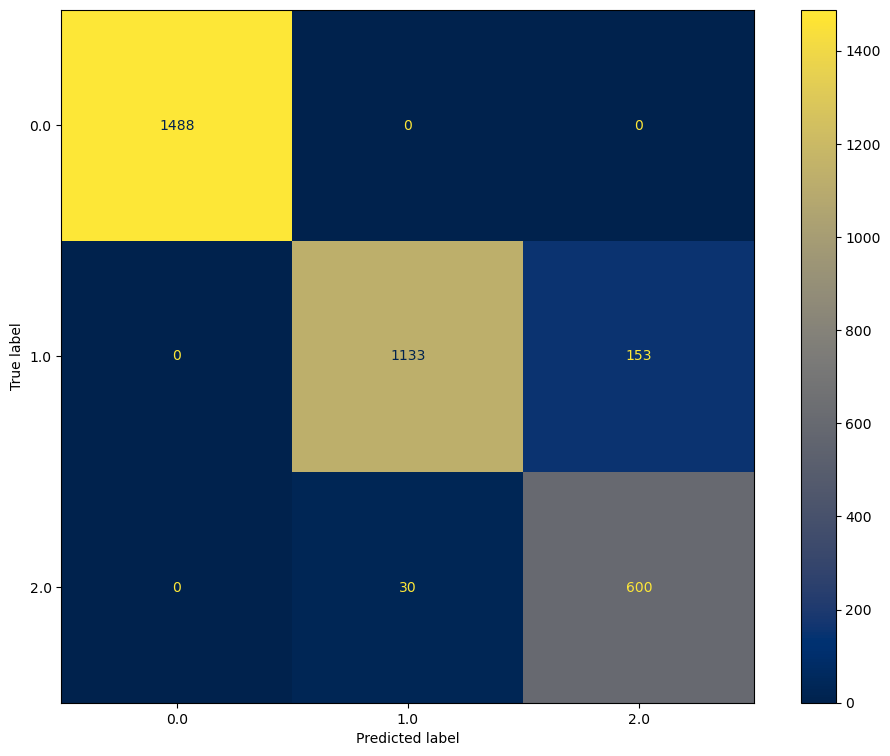

In [27]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# Instantiate Decision Tree Classifier with max leaf nodes = 3
tree_3_leaf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

# Train the classifier on the training data
tree_3_leaf.fit(X_train, y_train)

# Predict the test data with the trained tree classifier
y_predict = tree_3_leaf.predict(X_test)

# Print accuracy and classification report on test data
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))

# Plot confusion matrix on test data
fig, ax = plt.subplots(figsize=(12, 9))
disp = ConfusionMatrixDisplay.from_estimator(tree_3_leaf, X_test, y_test, cmap='cividis', ax=ax)

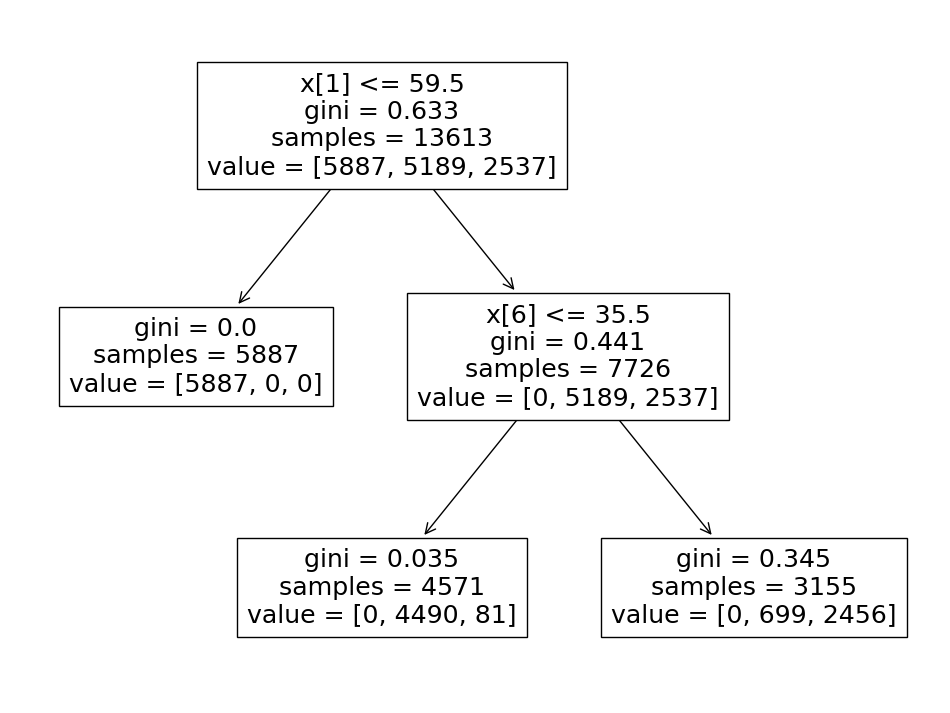

In [28]:
# Visualize decision logic of decision tree model
fig, ax = plt.subplots(figsize=(12, 9))
plot_tree(tree_3_leaf, ax= ax)
plt.show()

Accuracy: 0.9900117508813161
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5887
         1.0       1.00      1.00      1.00      5189
         2.0       1.00      1.00      1.00      2537

    accuracy                           1.00     13613
   macro avg       1.00      1.00      1.00     13613
weighted avg       1.00      1.00      1.00     13613



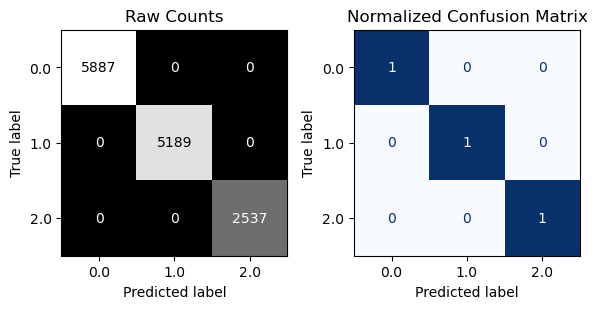


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.97      0.97      0.97       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



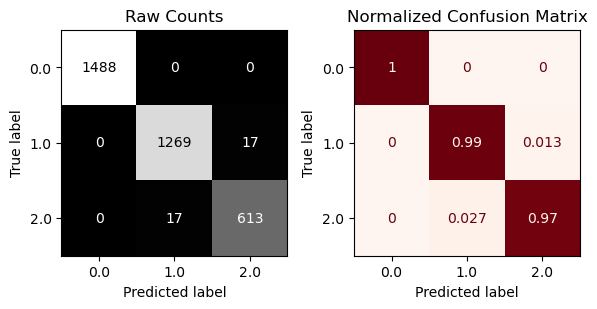

In [29]:
# Instantiate Decision Tree Classifier with default hyperparameter settings
tree = DecisionTreeClassifier(random_state=2)

# Train the classifier on the training data
tree.fit(X_train, y_train)

# Predict the test data with the trained tree classifier
y_predict = tree.predict(X_test)

# Print accuracy and classification report on test data
print("Accuracy:", accuracy_score(y_test, y_predict))
evaluate_classification(tree, X_train, y_train, X_test, y_test)

In [30]:
# Define the hyperparameter grid for the DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5887
         1.0       0.98      1.00      0.99      5189
         2.0       0.99      0.97      0.98      2537

    accuracy                           0.99     13613
   macro avg       0.99      0.99      0.99     13613
weighted avg       0.99      0.99      0.99     13613



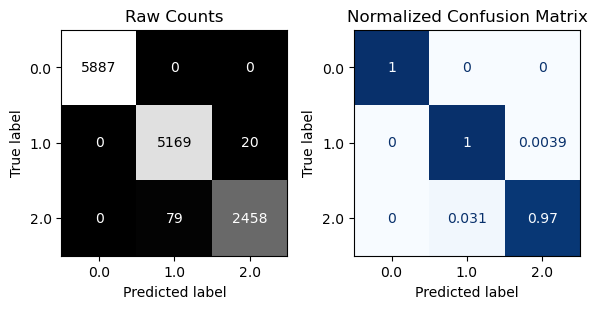


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.98      1.00      0.99      1286
         2.0       0.99      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



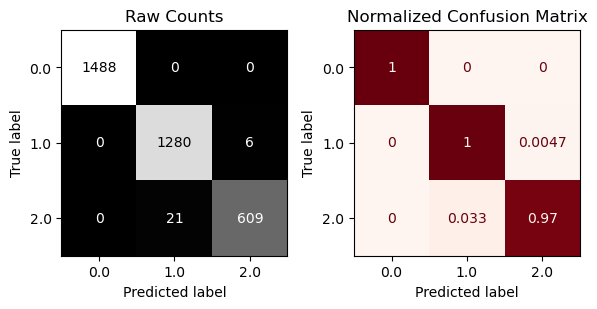

In [31]:
evaluate_classification(best_model, X_train, y_train, X_test, y_test)

Accuracy: 0.9908930669800236
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



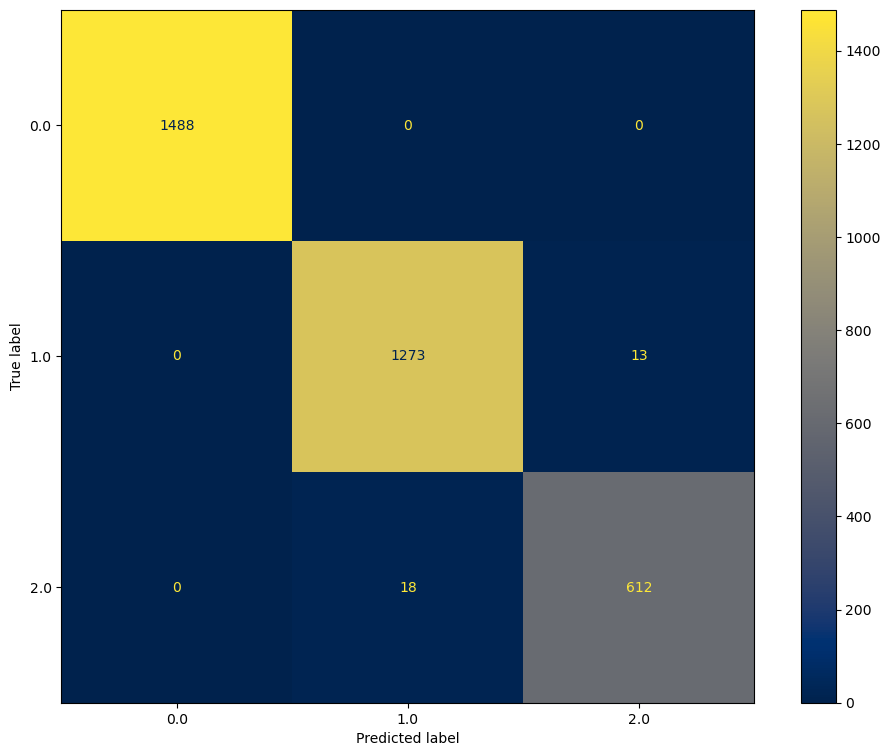

In [32]:
# Instantiate Random Forest Classifier
rf = RandomForestClassifier(random_state=2)

# Train Random Forest Classifier on training data
rf.fit(X_train, y_train)

# Predict test data with trained model
y_predict = rf.predict(X_test)

# Print accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))

# Plot confusion matrix on test data
fig, ax = plt.subplots(figsize=(12, 9))
disp = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='cividis', ax=ax)

runtime = 0.0061295693480302215
tomatometer_rating = 0.4751025864067028
tomatometer_count = 0.09895425717250429
audience_rating = 0.05389101976402856
audience_count = 0.016289896938110955
tomatometer_top_critics_count = 0.03605739578773787
tomatometer_fresh_critics_count = 0.14158242877024638
tomatometer_rotten_critics_count = 0.1314030539462201
G = 0.00029824734631526663
NC17 = 1.7090610669550172e-05
NR = 0.008710731204885382
PG = 0.0005762363713202383
PG-13 = 0.002531466583040527
R = 0.0022318936876928337
audience_status = 0.026224126062495294


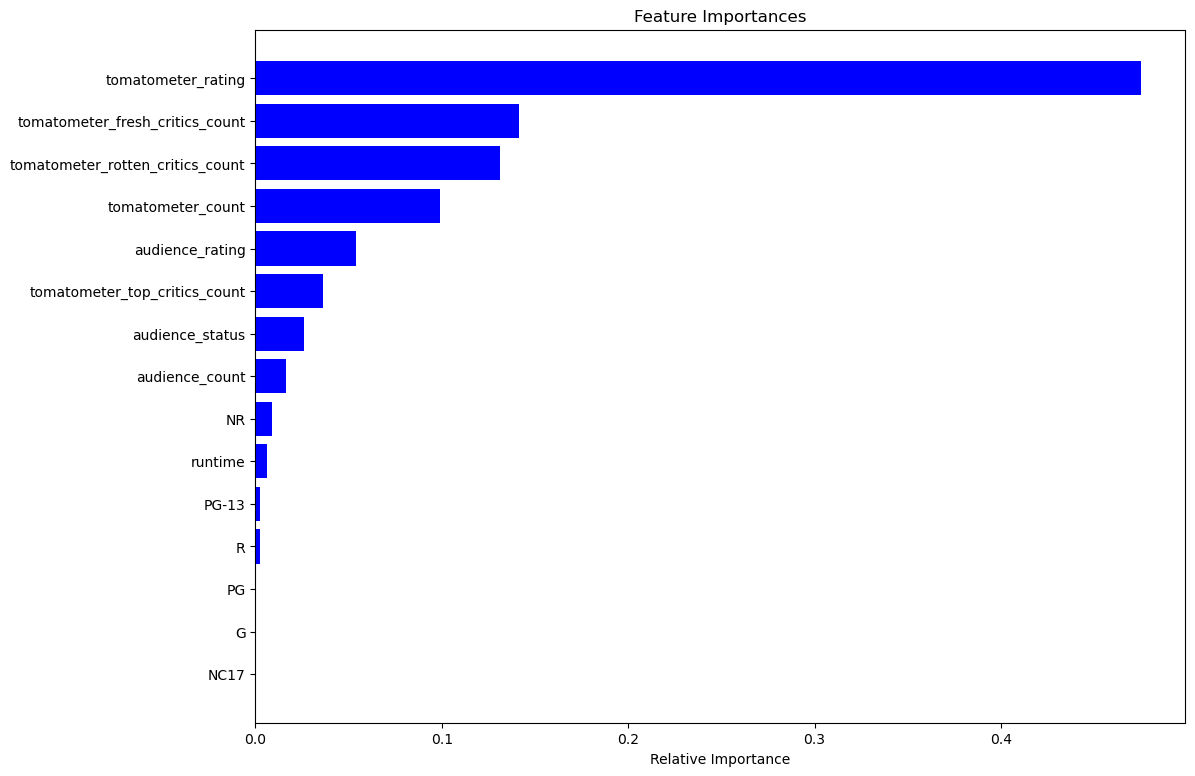

In [33]:
# Get the feature importance
feature_importance = rf.feature_importances_

# Print feature importance
for i, feature in enumerate(X_train.columns):
    print(f'{feature} = {feature_importance[i]}')

# Visualize feature from the most important to the least important
indices = np.argsort(feature_importance)

plt.figure(figsize=(12,9))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Random Forest Classifier with Feature Selection

In [34]:
# Split data into train and test after feature selection
X_train, X_test, y_train, y_test = train_test_split(df.drop(['tomatometer_status', 'NR', 'runtime', 'PG-13', 'R', 'PG','G', 'NC17'], axis=1),df.tomatometer_status, test_size= 0.2, random_state=42)
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 13613 and the size of test data is 3404


Accuracy: 0.9917743830787309
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



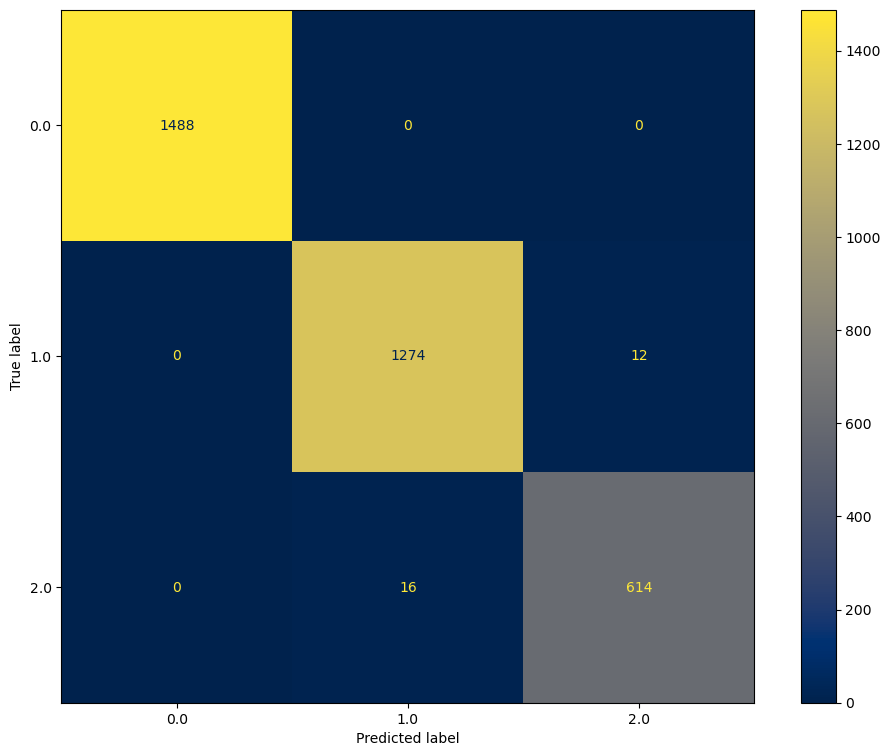

In [35]:
# Initialize Random Forest class
rf = RandomForestClassifier(random_state=2)

# Train Random Forest on the training data after feature selection
rf.fit(X_train, y_train)

# Predict the trained model on the test data after feature selection
y_predict = rf.predict(X_test)

# Print the accuracy score and the classification report
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))

# Plot the confusion matrix using ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(12, 9))
disp = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='cividis', ax=ax)

## Weighted Random Forest Classifier with Feature Selection

[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

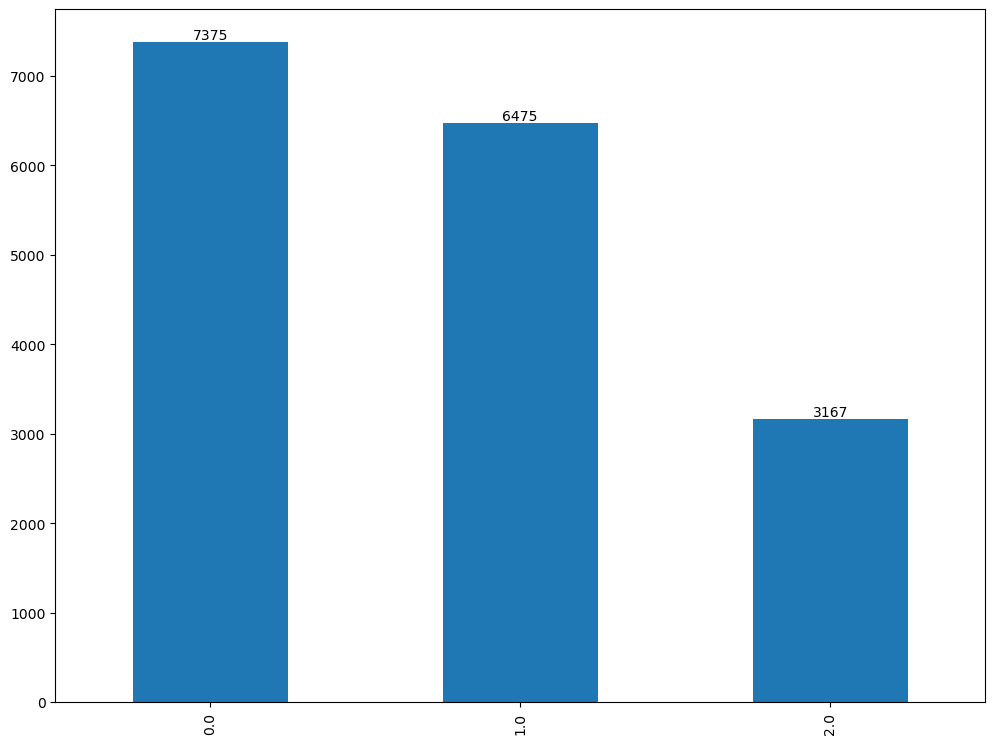

In [36]:
# Check class distribution of target variable once more
ax = df.tomatometer_status.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [37]:
# Compute class weight
class_weight = compute_class_weight(class_weight= 'balanced', classes= np.unique(df.tomatometer_status), 
                      y = df.tomatometer_status.values)

class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 0.7691299435028248, 1: 0.8760360360360361, 2: 1.7910746237238186}

Accuracy: 0.9926556991774383
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.98      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5887
         1.0       1.00      1.00      1.00      5189
         2.0       1.00      1.00      1.00      2537

    accuracy                           1.00     13613
   macro avg       1.00      1.00      1.00     13613
weighted avg       1.00      1.00      1.00     13613



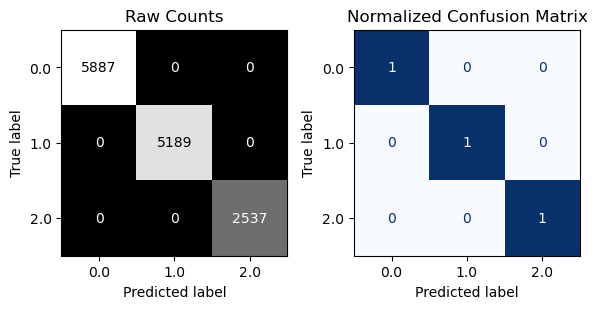


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.98      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



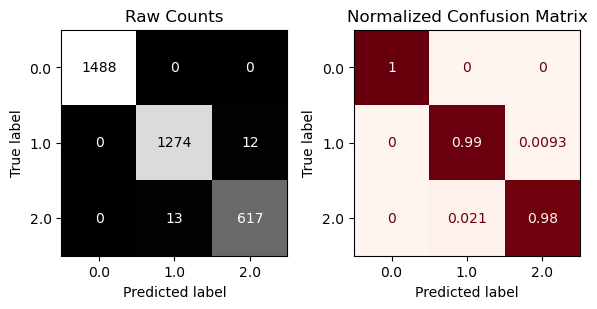

In [38]:
# Initialize Random Forest model with weight information
rf_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)

# Train the model on the training data
rf_weighted.fit(X_train, y_train)

# Predict the test data with the trained model
y_predict = rf_weighted.predict(X_test)

# Print accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))

evaluate_classification(rf_weighted, X_train, y_train, X_test, y_test)

## Predicting Movie Status Based on Review Sentiment

#### Import and merge data

In [39]:
# Read critics dataframe
df_critics = pd.read_csv('Data/rotten_tomatoes_critic_reviews_50k.csv')
df_critics.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [40]:
# Merging critics DataFrame with movie DataFrame
df_merged = df_critics.merge(df_movie, on=['rotten_tomatoes_link'])
df_merged = df_merged[['rotten_tomatoes_link', 'movie_title', 'review_content','review_type', 'tomatometer_status']]

In [41]:
# View the merged DataFrame
df_merged.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,A fantasy adventure that fuses Greek mythology...,Fresh,Rotten
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh,Rotten
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,With a top-notch cast and dazzling special eff...,Fresh,Rotten
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Whether audiences will get behind The Lightnin...,Fresh,Rotten
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,What's really lacking in The Lightning Thief i...,Rotten,Rotten


In [42]:
# Since this is a Sentimental Review we will remove all of the empty rows
df_merged = df_merged.dropna(subset=['review_content'])

[Text(0, 0, '25276'), Text(0, 0, '15919')]

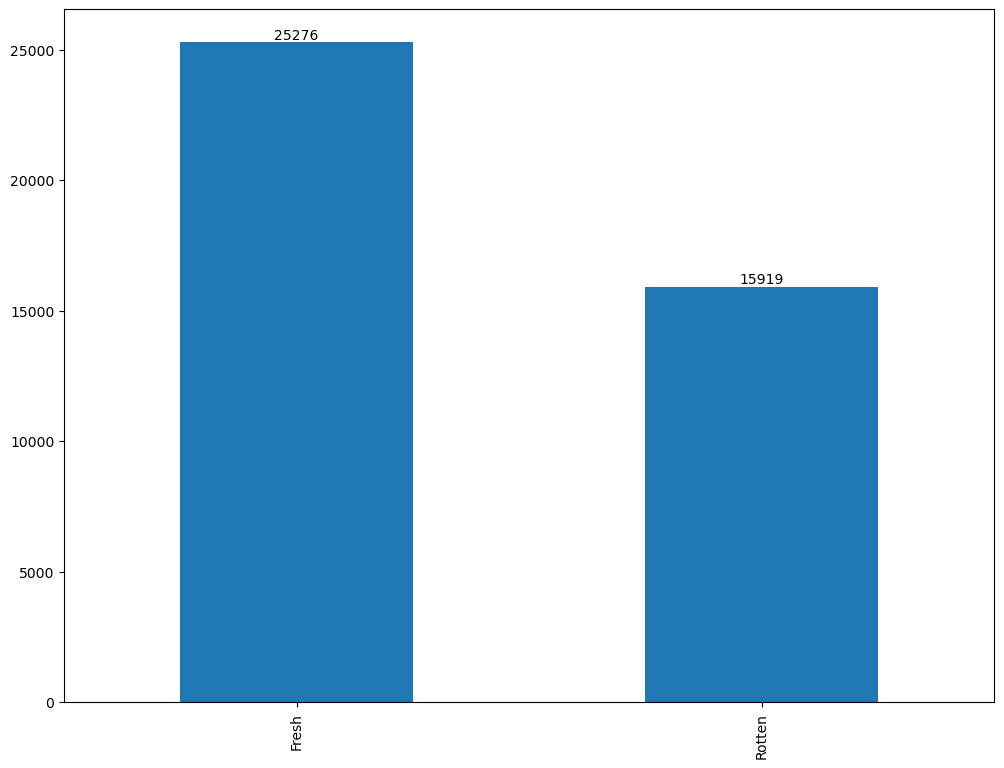

In [43]:
# Plotting the distribution of the review
ax = df_merged['review_type'].value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [44]:
# Picking only 0050 entries from the original dataset
df_sub = df_merged[0:5000]

# Encode the label
review_type = pd.DataFrame(df_sub['review_type'].replace(['Rotten', 'Fresh'], [0,1]))

# Build final dataframe
df_feature_critics = pd.concat([df_sub[['review_content']]
                        ,review_type], axis=1).dropna()
df_feature_critics.head()

,review_content,review_type
0,A fantasy adventure that fuses Greek mythology...,1
1,"Uma Thurman as Medusa, the gorgon with a coiff...",1
2,With a top-notch cast and dazzling special eff...,1
3,Whether audiences will get behind The Lightnin...,1
4,What's really lacking in The Lightning Thief i...,0


###  Random Forest

In [45]:
# Splitting the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df_feature_critics['review_content'], df_feature_critics['review_type'],
                                                   test_size=0.2, random_state=42)

In [46]:
# Instantiate vectorizer class
vectorizer = CountVectorizer(min_df=1)

# Transform our text data into vector
X_train_vec = vectorizer.fit_transform(X_train).toarray()

# Initialize random forest and train it
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train_vec, y_train)

# Predict and output classification report
y_predicted = rf.predict(vectorizer.transform(X_test).toarray())

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_predicted)

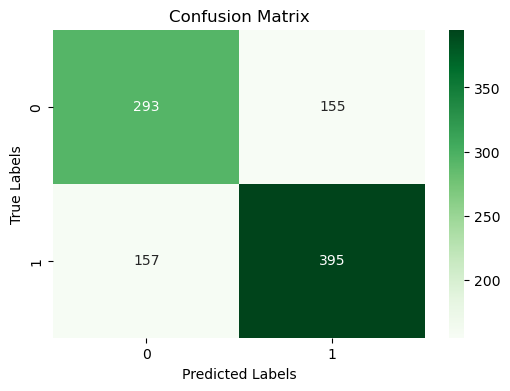

In [47]:
# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Weighted Random Forest

In [48]:
# Calculate class weight
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(df_feature_critics['review_type']),
                                    y = df_feature_critics['review_type'].values)

class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 1.058425063505504, 1: 0.9476876421531463}

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       448
           1       0.72      0.72      0.72       552

    accuracy                           0.69      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.69      0.69      0.69      1000



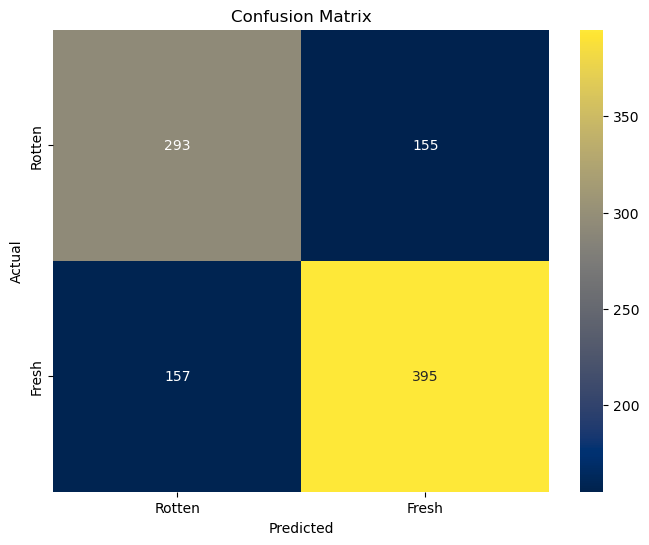

In [62]:
# Instantiate vectorizer class and fit it on training data
vectorizer = CountVectorizer(min_df=1)
X_train_vec = vectorizer.fit_transform(X_train).toarray()

# Initialize random forest and train it
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train_vec, y_train)

# Predict and output classification report
# Use the same vectorizer to transform the test data
X_test_vec = vectorizer.transform(X_test).toarray()
y_predicted = rf.predict(X_test_vec)

print(classification_report(y_test, y_predicted))

# Now create the confusion matrix using seaborn or other methods
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=['Rotten', 'Fresh'], yticklabels=['Rotten', 'Fresh'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

           0       0.65      0.65      0.65       448
           1       0.72      0.72      0.72       552

    accuracy                           0.69      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.69      0.69      0.69      1000



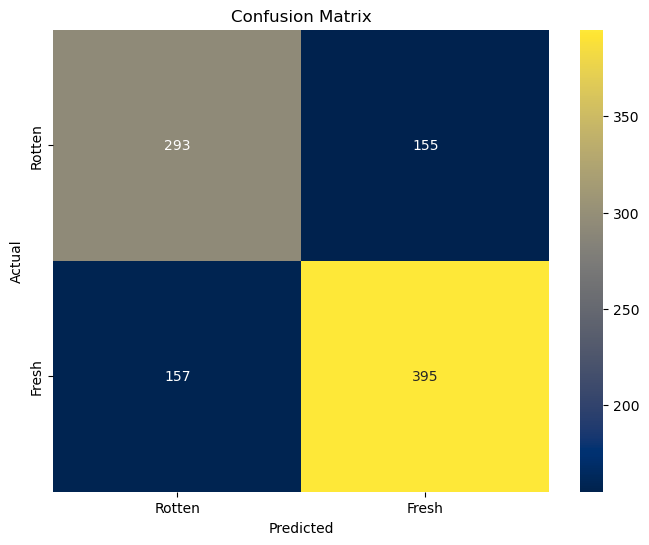

In [58]:
# Instantiate vectorizer class
vectorizer = CountVectorizer(min_df=1)

# Transform our text data into vector for training
X_train_vec = vectorizer.fit_transform(X_train).toarray()

# Ensure the number of features in the new data matches the training data
X_test_vec = vectorizer.transform(X_test).toarray()
X_test_vec = X_test_vec[:, :X_train_vec.shape[1]]

# Initialize random forest and train it
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train_vec, y_train)

# Predict and output classification report
y_predicted = rf.predict(X_test_vec)

print(classification_report(y_test, y_predicted))
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=['Rotten', 'Fresh'], yticklabels=['Rotten', 'Fresh'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Predicting Movie Status

#### Movie Prediction Function

In [64]:
# Define a function to predict movie status based on the overall sentiment
def predict_movie_status(prediction):
    """Assign label (Fresh/Rotten) based on prediction"""
    positive_percentage = (prediction == 1).sum()/len(prediction)*100
    
    prediction = 'Fresh' if positive_percentage >= 60 else 'Rotten'
    
    print(f'Positive review:{positive_percentage:.2f}%')
    print(f'Movie status: {prediction}')

#### `Body of Lies` *Correct (Rotten/Rotten)*

In [65]:
# Gather all of the reviews of Body of Lies movie
df_bol = df_merged.loc[df_merged['movie_title'] == 'Body of Lies']
df_bol.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
7382,m/10009225-body_of_lies,Body of Lies,DiCaprio (not Crowe) is in top form in Scott's...,Fresh,Rotten
7383,m/10009225-body_of_lies,Body of Lies,Neither the location-based verisimilitude of R...,Rotten,Rotten
7384,m/10009225-body_of_lies,Body of Lies,"DiCaprio gives the role plenty of brio, while ...",Fresh,Rotten
7385,m/10009225-body_of_lies,Body of Lies,"Convincing and gripping, Body of Lies is at th...",Fresh,Rotten
7386,m/10009225-body_of_lies,Body of Lies,Lies and consequences form the heart of this b...,Fresh,Rotten


In [67]:
# Instantiate vectorizer class and fit it on training data
vectorizer = CountVectorizer(min_df=1)
X_train_vec = vectorizer.fit_transform(X_train).toarray()

# Initialize weighted random forest and train it
rf_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)
rf_weighted.fit(X_train_vec, y_train)

# Get the prediction for 'Body of Lies' using the same vectorizer
y_predicted_bol = rf_weighted.predict(vectorizer.transform(df_bol['review_content']).toarray())

# Use the function to predict movie status
predict_movie_status(y_predicted_bol)

Positive review:50.49%
Movie status: Rotten


In [68]:
# Get the true label
df_merged['tomatometer_status'].loc[df_merged['movie_title'] == 'Body of Lies'].unique()

array(['Rotten'], dtype=object)

#### `Angel Heart` *Correct (Fresh/Fresh)*

In [69]:
# Gather all of the reviews of Angel Heart movie
df_ah = df_merged.loc[df_merged['movie_title'] == 'Angel Heart']
df_ah.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
9240,m/1000959-angel_heart,Angel Heart,"Angel Heart is a thriller and a horror movie, ...",Fresh,Fresh
9245,m/1000959-angel_heart,Angel Heart,Alan Parker's pulp sensibilities are beautiful...,Fresh,Fresh
9246,m/1000959-angel_heart,Angel Heart,One of the few truly great modern horror films,Fresh,Fresh
9248,m/1000959-angel_heart,Angel Heart,"Erotic, twisty and incredibly disturbed. Splen...",Fresh,Fresh
9249,m/1000959-angel_heart,Angel Heart,Este excepcional noir conta com maravilhosa fo...,Fresh,Fresh


In [70]:
# Get the prediction
y_predicted_ah = rf_weighted.predict(vectorizer.transform(df_ah['review_content']).toarray())
predict_movie_status(y_predicted_ah)

Positive review:61.11%
Movie status: Fresh


In [71]:
# Get the true label
df_merged['tomatometer_status'].loc[df_merged['movie_title'] == 'Angel Heart'].unique()

array(['Fresh'], dtype=object)

#### `The Duchess` *Correct (Fresh/Fresh)*

In [78]:
df_duchess = df_merged.loc[df_merged['movie_title']=='The Duchess']
df_duchess.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
8558,m/10009493-duchess,The Duchess,For all its luscious period trappings and Keir...,Rotten,Fresh
8559,m/10009493-duchess,The Duchess,Solid but distant melodrama about the flamboya...,Fresh,Fresh
8560,m/10009493-duchess,The Duchess,"It could have been an intriguing, poignant sag...",Rotten,Fresh
8561,m/10009493-duchess,The Duchess,Has riveting parallels with much more recent B...,Fresh,Fresh
8562,m/10009493-duchess,The Duchess,Ralph Fiennes steals it as the dour duke in a ...,Fresh,Fresh


In [79]:
# Getting the prediction
y_predicted_duchess = rf_weighted.predict(vectorizer.transform(df_duchess['review_content']).toarray())
predict_movie_status(y_predicted_duchess)

Positive review:60.12%
Movie status: Fresh


In [80]:
# Check the true label
df_merged['tomatometer_status'].loc[df_merged['movie_title']=='The Duchess'].unique()

array(['Fresh'], dtype=object)

#### `The Hangover` *Incorrect (Rotten/Certified Fresh)*

In [98]:
df_hangover = df_merged.loc[df_merged['movie_title']=='The Hangover']
df_hangover.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
11536,m/10010667-hangover,The Hangover,I loved Fat Jesus. A comedy that's funny and n...,Fresh,Certified-Fresh
11537,m/10010667-hangover,The Hangover,"Head-poundingly (in a good way), sidesplitting...",Fresh,Certified-Fresh
11538,m/10010667-hangover,The Hangover,Proudly inappropriate and buoyed by both a cle...,Fresh,Certified-Fresh
11539,m/10010667-hangover,The Hangover,The Hangover is surprisingly clever as well as...,Fresh,Certified-Fresh
11540,m/10010667-hangover,The Hangover,"Miraculously, we still like Alan and Stu and P...",Fresh,Certified-Fresh


In [100]:
# Getting the prediction
y_predicted_hangover = rf_weighted.predict(vectorizer.transform(df_hangover['review_content']).toarray())
predict_movie_status(y_predicted_hangover)

Positive review:47.23%
Movie status: Rotten


In [102]:
# Checking the True label
df_merged['tomatometer_status'].loc[df_merged['movie_title']=='The Hangover'].unique()

array(['Certified-Fresh'], dtype=object)

#### `Planet of the Apes` *Correct? (Rotten/Certified Fresh, Rotten)*

In [106]:
df_ape = df_merged.loc[df_merged['movie_title']=='Planet of the Apes']
df_ape.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
24805,m/1016397-planet_of_the_apes,Planet of the Apes,...an above-average science-fiction movie in s...,Fresh,Certified-Fresh
24806,m/1016397-planet_of_the_apes,Planet of the Apes,A magnificently indignant Heston ... wrestles ...,Fresh,Certified-Fresh
24807,m/1016397-planet_of_the_apes,Planet of the Apes,This fascinating premise is exploited to the f...,Fresh,Certified-Fresh
24808,m/1016397-planet_of_the_apes,Planet of the Apes,Examined difficult issues like bigotry and evo...,Fresh,Certified-Fresh
24809,m/1016397-planet_of_the_apes,Planet of the Apes,This classic sci-fi ape picture leaves its imi...,Fresh,Certified-Fresh


In [107]:
# Getting the prediction
y_predicted_ape = rf_weighted.predict(vectorizer.transform(df_ape['review_content']).toarray())
predict_movie_status(y_predicted_ape)

Positive review:52.66%
Movie status: Rotten


In [110]:
# Get the true label
df_merged['tomatometer_status'].loc[df_merged['movie_title'] == 'Planet of the Apes'].unique()

array(['Certified-Fresh', 'Rotten'], dtype=object)